In [1]:
!pip install torchsummary

In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pandas as pd
from PIL import Image


def iou(box, clusters):
    x = np.minimum(box[0], clusters[:, 0])
    y = np.minimum(box[1], clusters[:, 1])
    intersection = x * y
    box_area = box[0] * box[1]
    cluster_area = clusters[:, 0] * clusters[:, 1]
    iou_ = intersection / (box_area + cluster_area - intersection)
    return iou_

def avg_iou(boxes, clusters):
    return np.mean([np.max(iou(box, clusters)) for box in boxes])

def kmeans(boxes, k):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 'auto').fit(boxes)
    return kmeans.cluster_centers_
boxes = []


def get_image_size(image_path):
    with Image.open(image_path) as img:
        return img.size

df = pd.read_csv('/kaggle/input/ghana-crop-disease/Train.csv')
for row in range(len(df)):
    if row%1000==0:print(f'======================================={row}==============================')
    rowData = df.iloc[row]
    name = rowData['Image_ID']
    if row==0:
        dims = get_image_size(f'/kaggle/input/ghana-crop-disease/images/{name}')
    elif row!=0 and df.iloc[row]['Image_ID'] != df.iloc[row-1]['Image_ID']:
        dims = get_image_size(f'/kaggle/input/ghana-crop-disease/images/{name}')
    else:
        pass
    ymin = rowData['ymin']
    xmin = rowData['xmin']
    ymax = rowData['ymax']
    xmax = rowData['xmax']
    w = (xmax - xmin) / dims[0]
    h = (ymax - ymin) / dims[1]
    boxes.append([w, h])

    
# Load ground truth box dimensions (normalized)
boxes = np.array(boxes)  # Your dataset's bounding boxes
print(boxes.shape)

=======================================0==============================
=======================================1000==============================
=======================================2000==============================
=======================================3000==============================
=======================================4000==============================
=======================================5000==============================
=======================================6000==============================
=======================================7000==============================
=======================================8000==============================
=======================================9000==============================
=======================================10000==============================
=======================================11000==============================
=======================================12000==============================
======================================

In [3]:
# Determine 51 anchor boxes
anchors = kmeans(boxes, k=21)
print("Anchor boxes:", anchors)

Anchor boxes: [[0.07031048 0.140619  ]
 [0.18223551 0.51841727]
 [0.02000017 0.02698484]
 [0.24669237 0.26442689]
 [0.09142476 0.23013975]
 [0.43323639 0.31817762]
 [0.12207682 0.16106381]
 [0.05018818 0.08974585]
 [0.25844931 0.37980813]
 [0.14319673 0.39755856]
 [0.1019789  0.0925309 ]
 [0.2078764  0.16052583]
 [0.30677629 0.48991526]
 [0.44219081 0.58843565]
 [0.06702329 0.05552305]
 [0.03247068 0.05030982]
 [0.2382383  0.69919713]
 [0.1564523  0.30995407]
 [0.31866706 0.16627619]
 [0.16148177 0.22363035]
 [0.15891077 0.10319011]]


In [4]:
converted_list = [
    [(row[0], row[1]) for row in sublist]
    for sublist in np.array(sorted(anchors.tolist(), reverse = True)).reshape(-1,3,2).tolist()
]

# Print to verify
print(converted_list)

[[(0.44219081398822824, 0.5884356495550915), (0.4332363876236296, 0.318177622498353), (0.31866706109019927, 0.1662761863516624)], [(0.30677629202695983, 0.4899152576364183), (0.2584493133155672, 0.3798081296733544), (0.24669236559724803, 0.2644268886257012)], [(0.23823830341139182, 0.6991971295212143), (0.20787640089152282, 0.16052583117964878), (0.18223550785703557, 0.5184172729958092)], [(0.16148176590598542, 0.2236303531935046), (0.15891076605861698, 0.10319010557472189), (0.1564523041483048, 0.30995407181774315)], [(0.14319672706962755, 0.39755856107945464), (0.12207681510157409, 0.16106381348942736), (0.1019789006247353, 0.09253090326509776)], [(0.09142476307532083, 0.23013975217057403), (0.07031047599084374, 0.14061900308756198), (0.06702329459236046, 0.0555230468277868)], [(0.05018817991222392, 0.08974584908246905), (0.032470683317000336, 0.05030982123964288), (0.020000168103983612, 0.026984841846788177)]]


In [5]:
def iou(box, clusters):
    x_min = np.minimum(box[0], clusters[:, 0])
    y_min = np.minimum(box[1], clusters[:, 1])
    intersection = x_min * y_min
    box_area = box[0] * box[1]
    cluster_area = clusters[:, 0] * clusters[:, 1]
    iou_ = intersection / (box_area + cluster_area - intersection)
    return iou_

def avg_iou(boxes, clusters):
    return np.mean([np.max(iou(box, clusters)) for box in boxes])

# boxes should be ground truth normalized (width, height)
iou_score = avg_iou(boxes, np.array(sorted(anchors.tolist(), reverse = True)))
print("Average IoU:", iou_score)

Average IoU: 0.7182875717290333


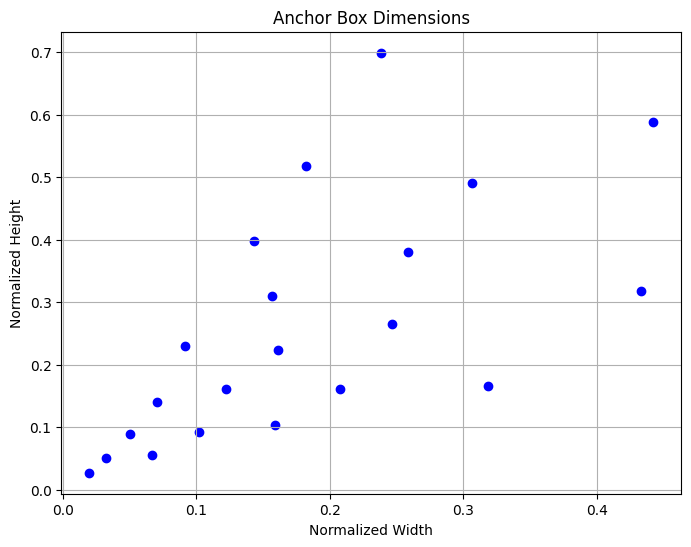

In [6]:
def plot_anchor_dimensions(anchors):
    widths = [anchor[0] for anchor in anchors]
    heights = [anchor[1] for anchor in anchors]

    plt.figure(figsize=(8, 6))
    plt.scatter(widths, heights, c='blue', marker='o')
    plt.xlabel("Normalized Width")
    plt.ylabel("Normalized Height")
    plt.title("Anchor Box Dimensions")
    plt.grid(True)
    plt.show()
plot_anchor_dimensions(anchors)

Anchor Points Analysis:

Overall Statistics:
mean_x: 0.1814
mean_y: 0.2603
std_x: 0.1179
std_y: 0.1860

Group-wise Statistics:

Group 0:
mean_x: 0.0342
mean_y: 0.0557
std_x: 0.0124
std_y: 0.0259
range_x: 0.0302
range_y: 0.0628

Group 1:
mean_x: 0.0763
mean_y: 0.1421
std_x: 0.0108
std_y: 0.0713
range_x: 0.0244
range_y: 0.1746

Group 2:
mean_x: 0.1224
mean_y: 0.2171
std_x: 0.0168
std_y: 0.1307
range_x: 0.0412
range_y: 0.3050

Group 3:
mean_x: 0.1589
mean_y: 0.2123
std_x: 0.0021
std_y: 0.0848
range_x: 0.0050
range_y: 0.2068

Group 4:
mean_x: 0.2095
mean_y: 0.4594
std_x: 0.0229
std_y: 0.2238
range_x: 0.0560
range_y: 0.5387

Group 5:
mean_x: 0.2706
mean_y: 0.3781
std_x: 0.0260
std_y: 0.0921
range_x: 0.0601
range_y: 0.2255

Group 6:
mean_x: 0.3980
mean_y: 0.3576
std_x: 0.0562
std_y: 0.1746
range_x: 0.1235
range_y: 0.4222


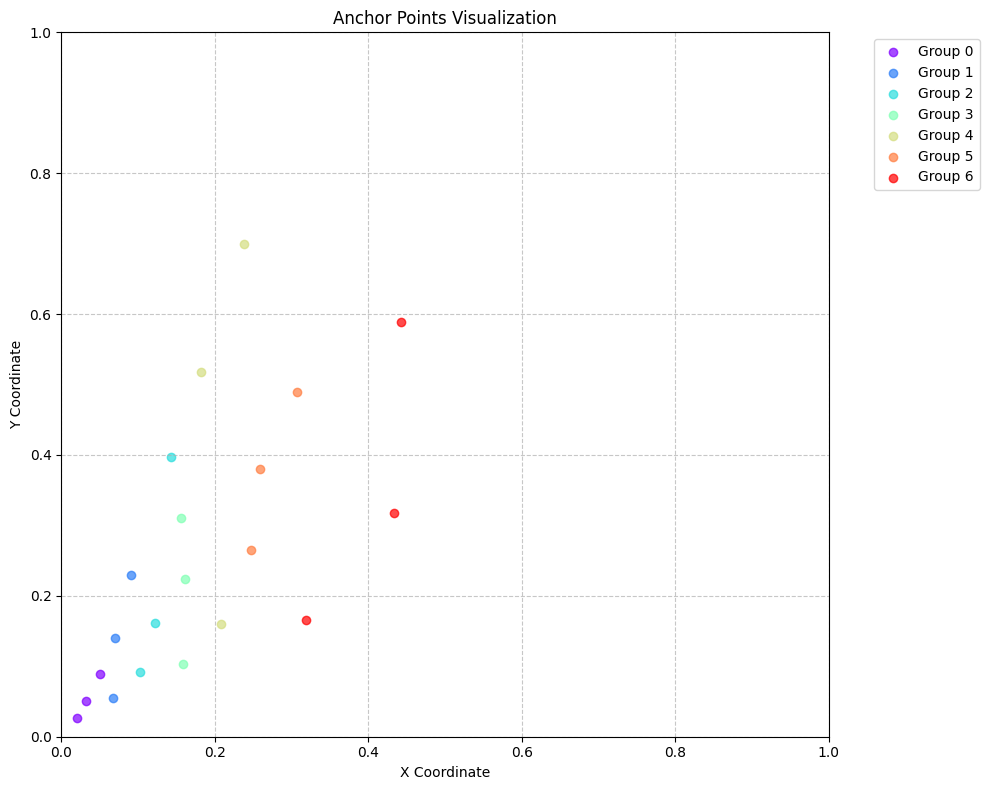

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Your anchor points
ANCHORS = sorted(converted_list, reverse = False)

def analyze_anchors(anchors):
    """
    Perform comprehensive analysis of anchor points.
    
    :param anchors: List of anchor point groups
    :return: Dictionary of analysis results
    """
    # Convert to numpy array for easier computation
    anchor_array = np.array(anchors)
    
    # Basic statistics
    analysis = {
        'num_anchor_groups': len(anchors),
        'points_per_group': len(anchors[0]),
        'overall_stats': {
            'mean_x': np.mean(anchor_array[:,:,0]),
            'mean_y': np.mean(anchor_array[:,:,1]),
            'std_x': np.std(anchor_array[:,:,0]),
            'std_y': np.std(anchor_array[:,:,1]),
        }
    }
    
    # Detailed per-group analysis
    group_stats = []
    for i, group in enumerate(anchors):
        group_array = np.array(group)
        group_stats.append({
            'group_index': i,
            'mean_x': np.mean(group_array[:,0]),
            'mean_y': np.mean(group_array[:,1]),
            'std_x': np.std(group_array[:,0]),
            'std_y': np.std(group_array[:,1]),
            'range_x': np.ptp(group_array[:,0]),
            'range_y': np.ptp(group_array[:,1])
        })
    
    analysis['group_stats'] = group_stats
    
    return analysis

def visualize_anchors(anchors):
    """
    Create a scatter plot of anchor points.
    
    :param anchors: List of anchor point groups
    """
    plt.figure(figsize=(10, 8))
    
    # Color map to differentiate groups
    colors = plt.cm.rainbow(np.linspace(0, 1, len(anchors)))
    
    for i, (group, color) in enumerate(zip(anchors, colors)):
        x_coords = [point[0] for point in group]
        y_coords = [point[1] for point in group]
        
        plt.scatter(x_coords, y_coords, color=color, label=f'Group {i}', alpha=0.7)
    
    plt.title('Anchor Points Visualization')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Perform analysis
analysis_results = analyze_anchors(ANCHORS)

# Print analysis results
print("Anchor Points Analysis:")
print("\nOverall Statistics:")
for key, value in analysis_results['overall_stats'].items():
    print(f"{key}: {value:.4f}")

print("\nGroup-wise Statistics:")
for group in analysis_results['group_stats']:
    print(f"\nGroup {group['group_index']}:")
    for key, value in group.items():
        if key != 'group_index':
            print(f"{key}: {value:.4f}")

# Visualize anchors
visualize_anchors(ANCHORS)

In [8]:
import torch 
import torch.nn as nn 
import torch.optim as optim 

from PIL import Image, ImageFile 
ImageFile.LOAD_TRUNCATED_IMAGES = True

import albumentations as A 
from albumentations.pytorch import ToTensorV2 
import cv2 

import os 
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import matplotlib.patches as patches 

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
import gc
import os
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import albumentations as A
import cv2
from typing import List, Tuple, Optional
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR

from tqdm import tqdm

/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.21). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [9]:
def set_seed(seed):
    # Set Python's random module seed
    random.seed(seed)
    
    # Set NumPy random seed
    np.random.seed(seed)
    
    # Set PyTorch random seed
    torch.manual_seed(seed)
    
    # Set PyTorch's CUDA random seed for all GPUs
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # For multi-GPU setups
    
    # Ensure deterministic behavior (may affect performance)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(101)

In [10]:
# Defining a function to calculate Intersection over Union (IoU) 
def iou(box1, box2, is_pred=True): 
	if is_pred: 
		# IoU score for prediction and label 
		# box1 (prediction) and box2 (label) are both in [x, y, width, height] format 
		
		# Box coordinates of prediction 
		b1_x1 = box1[..., 0:1] - box1[..., 2:3] / 2
		b1_y1 = box1[..., 1:2] - box1[..., 3:4] / 2
		b1_x2 = box1[..., 0:1] + box1[..., 2:3] / 2
		b1_y2 = box1[..., 1:2] + box1[..., 3:4] / 2

		# Box coordinates of ground truth 
		b2_x1 = box2[..., 0:1] - box2[..., 2:3] / 2
		b2_y1 = box2[..., 1:2] - box2[..., 3:4] / 2
		b2_x2 = box2[..., 0:1] + box2[..., 2:3] / 2
		b2_y2 = box2[..., 1:2] + box2[..., 3:4] / 2

		# Get the coordinates of the intersection rectangle 
		x1 = torch.max(b1_x1, b2_x1) 
		y1 = torch.max(b1_y1, b2_y1) 
		x2 = torch.min(b1_x2, b2_x2) 
		y2 = torch.min(b1_y2, b2_y2) 
		# Make sure the intersection is at least 0 
		intersection = (x2 - x1).clamp(0) * (y2 - y1).clamp(0) 

		# Calculate the union area 
		box1_area = abs((b1_x2 - b1_x1) * (b1_y2 - b1_y1)) 
		box2_area = abs((b2_x2 - b2_x1) * (b2_y2 - b2_y1)) 
		union = box1_area + box2_area - intersection 

		# Calculate the IoU score 
		epsilon = 1e-6
		iou_score = intersection / (union + epsilon) 

		# Return IoU score 
		return iou_score 
	
	else: 
		# IoU score based on width and height of bounding boxes 
		
		# Calculate intersection area 
		intersection_area = torch.min(box1[..., 0], box2[..., 0]) * torch.min(box1[..., 1], box2[..., 1]) 

		# Calculate union area 
		box1_area = box1[..., 0] * box1[..., 1] 
		box2_area = box2[..., 0] * box2[..., 1] 
		union_area = box1_area + box2_area - intersection_area 

		# Calculate IoU score 
		iou_score = intersection_area / union_area 

		# Return IoU score 
		return iou_score

In [11]:
# Non-maximum suppression function to remove overlapping bounding boxes 
def nms(bboxes, iou_threshold, threshold): 
	# Filter out bounding boxes with confidence below the threshold. 
	bboxes = [box for box in bboxes if box[1] > threshold] 

	# Sort the bounding boxes by confidence in descending order. 
	bboxes = sorted(bboxes, key=lambda x: x[1], reverse=True) 

	# Initialize the list of bounding boxes after non-maximum suppression. 
	bboxes_nms = [] 

	while bboxes: 
		# Get the first bounding box. 
		first_box = bboxes.pop(0) 

		# Iterate over the remaining bounding boxes. 
		for box in bboxes: 
		# If the bounding boxes do not overlap or if the first bounding box has 
		# a higher confidence, then add the second bounding box to the list of 
		# bounding boxes after non-maximum suppression. 
			if box[0] != first_box[0] or iou( 
				torch.tensor(first_box[2:]), 
				torch.tensor(box[2:]), 
			) < iou_threshold: 
				# Check if box is not in bboxes_nms 
				if box not in bboxes_nms: 
					# Add box to bboxes_nms 
					bboxes_nms.append(box) 

	# Return bounding boxes after non-maximum suppression. 
	return bboxes_nms

In [12]:
# Function to convert cells to bounding boxes 
def convert_cells_to_bboxes(predictions, anchors, s, is_predictions=True): 
	# Batch size used on predictions 
	batch_size = predictions.shape[0] 
	# Number of anchors 
	num_anchors = len(anchors) 
	# List of all the predictions 
	box_predictions = predictions[..., 1:5] 

	# If the input is predictions then we will pass the x and y coordinate 
	# through sigmoid function and width and height to exponent function and 
	# calculate the score and best class. 
	if is_predictions: 
		anchors = anchors.reshape(1, len(anchors), 1, 1, 2) 
		box_predictions[..., 0:2] = torch.sigmoid(box_predictions[..., 0:2]) 
		box_predictions[..., 2:] = torch.exp( 
			box_predictions[..., 2:]) * anchors 
		scores = torch.sigmoid(predictions[..., 0:1]) 
		best_class = torch.argmax(predictions[..., 5:], dim=-1).unsqueeze(-1) 
	
	# Else we will just calculate scores and best class. 
	else: 
		scores = predictions[..., 0:1] 
		best_class = predictions[..., 5:6] 

	# Calculate cell indices 
	cell_indices = ( 
		torch.arange(s) 
		.repeat(predictions.shape[0], 3, s, 1) 
		.unsqueeze(-1) 
		.to(predictions.device) 
	) 

	# Calculate x, y, width and height with proper scaling 
	x = 1 / s * (box_predictions[..., 0:1] + cell_indices) 
	y = 1 / s * (box_predictions[..., 1:2] +
				cell_indices.permute(0, 1, 3, 2, 4)) 
	width_height = 1 / s * box_predictions[..., 2:4] 

	# Concatinating the values and reshaping them in 
	# (BATCH_SIZE, num_anchors * S * S, 6) shape 
	converted_bboxes = torch.cat( 
		(best_class, scores, x, y, width_height), dim=-1
	).reshape(batch_size, num_anchors * s * s, 6) 

	# Returning the reshaped and converted bounding box list 
	return converted_bboxes.tolist()

In [13]:

# Function to plot images with boundng boxes and class labels 
def plot_image(image, boxes): 
	# Getting the color map from matplotlib 
	colour_map = plt.get_cmap("tab20b") 
	# Getting 20 different colors from the color map for 20 different classes 
	colors = [colour_map(i) for i in np.linspace(0, 1, len(class_labels))] 

	# Reading the image with OpenCV 
	img = np.array(image) 
	# Getting the height and width of the image 
	h, w, _ = img.shape 

	# Create figure and axes 
	fig, ax = plt.subplots(1) 

	# Add image to plot 
	ax.imshow(img) 

	# Plotting the bounding boxes and labels over the image 
	for box in boxes: 
		# Get the class from the box 
		class_pred = box[0] 
		# Get the center x and y coordinates 
		box = box[2:] 
		# Get the upper left corner coordinates 
		upper_left_x = box[0] - box[2] / 2
		upper_left_y = box[1] - box[3] / 2

		# Create a Rectangle patch with the bounding box 
		rect = patches.Rectangle( 
			(upper_left_x * w, upper_left_y * h), 
			box[2] * w, 
			box[3] * h, 
			linewidth=2, 
			edgecolor='red', 
			facecolor="none", 
		) 
		
		# Add the patch to the Axes 
		ax.add_patch(rect) 
		
		# Add class name to the patch 
		plt.text( 
			upper_left_x * w, 
			upper_left_y * h, 
			s=class_labels[int(class_pred)], 
			color="white", 
			verticalalignment="top", 
			bbox={"color": colors[int(class_pred)], "pad": 0}, 
		) 

	# Display the plot 
	plt.show()

[20, 40, 80, 160, 320, 640, 1280]
torch.Size([7, 3, 2])


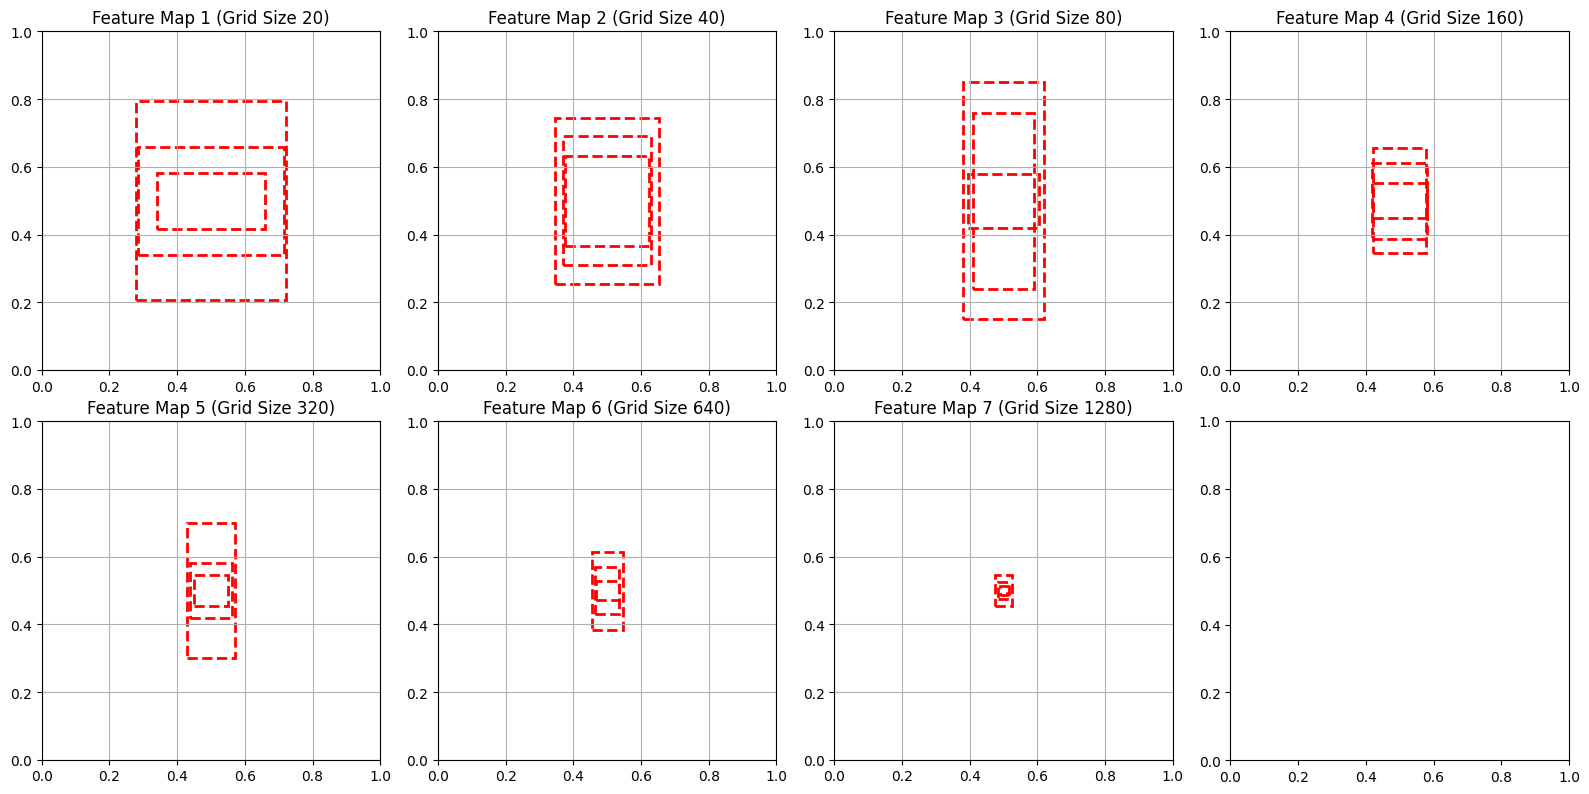

In [14]:
# Re-import torch and redefine the relevant variables to ensure proper execution.

import torch
import matplotlib.pyplot as plt

# Define the ANCHORS and GRID_SIZE
ANCHORS = sorted(converted_list, reverse=True)
IMAGE_SIZES = 1280

GRID_SIZE = [IMAGE_SIZES//(2**i) for i in range(6,-1,-1)]
print(GRID_SIZE)

# Convert to tensors
anchors_tensor = torch.tensor(ANCHORS)  # Shape: (8, 3, 2)
print(anchors_tensor.shape)
grid_size_tensor = torch.tensor(GRID_SIZE).unsqueeze(1).unsqueeze(1).repeat(1, 3, 2)  # Shape: (7, 3, 2)

# Compute scaled anchors
scaled_anchors = anchors_tensor# / (1 / grid_size_tensor)

# Visualize the anchors for each feature map
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, ax in enumerate(axes[:-1]):
    anchor_sizes = scaled_anchors[i].numpy()
    grid_size = GRID_SIZE[i]
    
    for anchor in anchor_sizes:
        width, height = anchor
        rect = plt.Rectangle((0.5 - width / 2, 0.5 - height / 2), width, height,
                             edgecolor='red', facecolor='none', linestyle='--', linewidth=2)
        ax.add_patch(rect)
    
    ax.set_title(f'Feature Map {i+1} (Grid Size {grid_size})')
    # ax.set_xlim(0, 1)
    # ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    ax.grid(True)

plt.tight_layout()
plt.show()


In [15]:
# Function to save checkpoint 
def save_checkpoint(model, optimizer, filename="my_checkpoint.pth.tar"): 
	print("==> Saving checkpoint") 
	checkpoint = { 
		"state_dict": model.state_dict(), 
		"optimizer": optimizer.state_dict(), 
	} 
	torch.save(checkpoint, filename)

# Function to load checkpoint 
def load_checkpoint(checkpoint_file, model, optimizer, lr): 
	print("==> Loading checkpoint") 
	checkpoint = torch.load(checkpoint_file, map_location=device) 
	model.load_state_dict(checkpoint["state_dict"]) 
	optimizer.load_state_dict(checkpoint["optimizer"]) 

	for param_group in optimizer.param_groups: 
		param_group["lr"] = lr 

# Device 
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load and save model variable 
load_model = False
save_model = True

# model checkpoint file name 
checkpoint_file = "checkpoint.pth.tar"

# Anchor boxes for each feature map scaled between 0 and 1 
# 3 feature maps at 3 different scales based on YOLOv3 paper 
ANCHORS = ANCHORS = sorted(converted_list, reverse=True)


# Batch size for training 
batch_size = 4

# Learning rate for training 
leanring_rate = 1e-3

# Number of epochs for training 
epochs = 100

# Image size 
image_size = 1280

# Grid cell sizes 
s = [IMAGE_SIZES//(2**i) for i in range(6,-1,-1)]

# Class labels 
class_labels = [
	'Pepper_Bacterial_Spot', 'Pepper_Fusarium',
	'Corn_Cercospora_Leaf_Spot', 'Corn_Common_Rust',
    'Tomato_Early_Blight', 'Pepper_Septoria', 'Tomato_Septoria',
    'Pepper_Leaf_Curl', 'Pepper_Leaf_Mosaic', 'Corn_Streak',
    'Corn_Healthy', 'Pepper_Healthy', 'Tomato_Healthy',
    'Pepper_Late_Blight', 'Tomato_Late_Blight', 'Pepper_Cercospora',
    'Tomato_Fusarium', 'Pepper_Leaf_Blight', 'Tomato_Leaf_Curl',
    'Tomato_Bacterial_Spot', 'Tomato_Mosaic', 'Pepper_Early_Blight',
    'Corn_Northern_Leaf_Blight'
	]

In [16]:
# Create a dataset class to load the images and labels from the folder 
class Dataset(torch.utils.data.Dataset): 
	def __init__( 
		self, csv_file, image_dir, anchors, 
		image_size=1280, grid_sizes=[IMAGE_SIZES//(2**i) for i in range(6,-1,-1)],
		num_classes=20, transform=None, min_object_size=20, eps = 1e-4, train = True
		):

		"""
        Args:
            csv_file (str): Path to annotations CSV
            image_dir (str): Directory with images
			anchors list[list[tuple(int)]]: anchorss for different feature maps
            image_size (int): Image size for resizing (height, width)
            min_object_size (int): Minimum size in pixels for objects after resizing
        """ 
	
		# Read the csv file with image names and labels 
		self.annotations = pd.read_csv(csv_file); self.annotations = self.annotations[~self.annotations['class'].str.endswith('Healthy')]
		# Image and label directories 
		self.image_dir = image_dir 
		# Image size 
		self.image_size = image_size 
		# Transformations 
		self.transform = transform 
		# Grid sizes for each scale 
		self.grid_sizes = grid_sizes 
		# Anchor boxes 
		self.anchors =  torch.tensor(sum(anchors, []))
		# Number of anchor boxes 
		self.num_anchors = self.anchors.shape[0] 
		# Number of anchor boxes per scale 
		self.num_anchors_per_scale = self.num_anchors // len(self.grid_sizes)
		# Number of classes 
		# Get unique classes and create class mapping
		self.classes = self.annotations['class'].unique()
		self.class_to_idx = {cls_name: idx for idx, cls_name in enumerate(self.classes)}
		self.num_classes = len(self.classes); self.eps = eps
		
		# Group annotations by image
		self.image_groups = self.annotations.groupby('Image_ID')

		# Ignore IoU threshold 
		self.ignore_iou_thresh = 0.5

	def __len__(self):
		return len(self.image_groups)
	
	def __getitem__(self, idx): 		
		# Getting the image path 
		img_id = list(self.image_groups.groups.keys())[idx]
		img_annotations = self.image_groups.get_group(img_id)
        
        # Load image
		img_path = os.path.join(self.image_dir, img_id)
		image = np.array(Image.open(img_path).convert('RGB'))

		original_size = image.shape; bboxes = []
        # Get bounding boxes and labels
		for _, row in img_annotations.iterrows():
			xmin  = row['xmin']
			xmax  = row['xmax']
			ymin  = row['ymin']
			ymax  = row['ymax']
			label = self.class_to_idx[row['class']]; #print(row)

			cx = (xmin + xmax) / 2 / original_size[1]
			cy = (ymin + ymax) / 2 / original_size[0]
			w = (xmax - xmin) / original_size[1]
			h = (ymax - ymin) / original_size[0]
            
			if w>0.01 and h>0.01: bboxes.append([cx, cy, w, h,label])
        
        # Convert to tensors
		bboxes = torch.FloatTensor(bboxes)
    
		# Albumentations augmentations 
		if self.transform: 
			augs = self.transform(image=image, bboxes=bboxes.numpy()) 
			image = augs["image"] 
			bboxes = augs["bboxes"] 

		# target : [probabilities, x, y, width, height, class_label] 
		targets = [torch.zeros((self.num_anchors_per_scale, s, s, 6)) 
				for s in self.grid_sizes] 
		
		# Identify anchor box and cell for each bounding box 
		for box in bboxes: 
			# Calculate iou of bounding box with anchor boxes 
			iou_anchors = iou(torch.tensor(box[2:4]), 
							self.anchors, 
							is_pred=False) 
			# Selecting the best anchor box 
			anchor_indices = iou_anchors.argsort(descending=True, dim=0) 
			x, y, width, height, class_label = box 
			# At each scale, assigning the bounding box to the 
			# best matching anchor box 
			has_anchor = [False] * len(self.grid_sizes)
			for anchor_idx in anchor_indices: 
				scale_idx = anchor_idx // self.num_anchors_per_scale 
				anchor_on_scale = anchor_idx % self.num_anchors_per_scale 
				
				# Identifying the grid size for the scale 
				s = self.grid_sizes[scale_idx] 
				
				# Identifying the cell to which the bounding box belongs 
				i, j = int(s * y), int(s * x) 
				anchor_taken = targets[scale_idx][anchor_on_scale, i, j, 0] 
				
				# Check if the anchor box is already assigned 
				if not anchor_taken and not has_anchor[scale_idx]: 

					# Set the probability to 1 
					targets[scale_idx][anchor_on_scale, i, j, 0] = 1

					# Calculating the center of the bounding box relative 
					# to the cell 
					x_cell, y_cell = s * x - j, s * y - i 

					# Calculating the width and height of the bounding box 
					# relative to the cell 
					width_cell, height_cell = (width * s, height * s) 

					# Idnetify the box coordinates 
					box_coordinates = torch.tensor( 
										[x_cell, y_cell, width_cell, 
										height_cell] 
									) 

					# Assigning the box coordinates to the target 
					targets[scale_idx][anchor_on_scale, i, j, 1:5] = box_coordinates 

					# Assigning the class label to the target 
					targets[scale_idx][anchor_on_scale, i, j, 5] = int(class_label) 

					# Set the anchor box as assigned for the scale 
					has_anchor[scale_idx] = True

				# If the anchor box is already assigned, check if the 
				# IoU is greater than the threshold 
				elif not anchor_taken and iou_anchors[anchor_idx] > self.ignore_iou_thresh: 
					# Set the probability to -1 to ignore the anchor box 
					targets[scale_idx][anchor_on_scale, i, j, 0] = -1

		# Return the image and the target 
		return image, tuple(targets)

In [21]:
# Transform for training 
train_transform = A.Compose( 
	[ 
		# Rescale an image so that maximum side is equal to image_size 
		A.LongestMaxSize(max_size=image_size), 
		# Pad remaining areas with zeros 
		A.PadIfNeeded( 
			min_height=image_size, min_width=image_size, border_mode=cv2.BORDER_CONSTANT, value = 0
		), 
		# Random color jittering 
		A.ColorJitter( 
			brightness=0.5, contrast=0.5, 
			saturation=0.5, hue=0.5, p=0.5
		), 
		# Flip the image horizontally 
		A.HorizontalFlip(p=0.5), 
		# Normalize the image 
		A.Normalize( 
			mean=[0, 0, 0], std=[1, 1, 1], max_pixel_value=255
		), 
		# Convert the image to PyTorch tensor 
		ToTensorV2() 
	], 
	# Augmentation for bounding boxes 
	bbox_params=A.BboxParams( 
					format="yolo", 
					min_visibility=0.4, 
					label_fields=[] 
				) 
) 

# Transform for testing 
test_transform = A.Compose( 
	[ 
		# Rescale an image so that maximum side is equal to image_size 
		A.LongestMaxSize(max_size=image_size), 
		# Pad remaining areas with zeros 
		A.PadIfNeeded( 
			min_height=image_size, min_width=image_size, border_mode=cv2.BORDER_CONSTANT, value = 0
		), 
		# Normalize the image 
		A.Normalize( 
			mean=[0, 0, 0], std=[1, 1, 1], max_pixel_value=255
		), 
		# Convert the image to PyTorch tensor 
		ToTensorV2() 
	], 
	# Augmentation for bounding boxes 
	bbox_params=A.BboxParams( 
					format="yolo", 
					min_visibility=0.4, 
					label_fields=[] 
				) 
)

In [22]:
# Creating a dataset object 
dataset = Dataset( 
	csv_file="/kaggle/input/ghana-crop-disease/Train.csv", 
	image_dir="/kaggle/input/ghana-crop-disease/images", 
	grid_sizes=s, 
	anchors=ANCHORS, 
	transform=test_transform 
) 

# Creating a dataloader object 
loader = torch.utils.data.DataLoader( 
	dataset=dataset, 
	batch_size=1, 
	shuffle=True, 
)

In [23]:
num_classes = dataset.num_classes
print("NUMBER OF CLASSES:", num_classes)

NUMBER OF CLASSES: 20


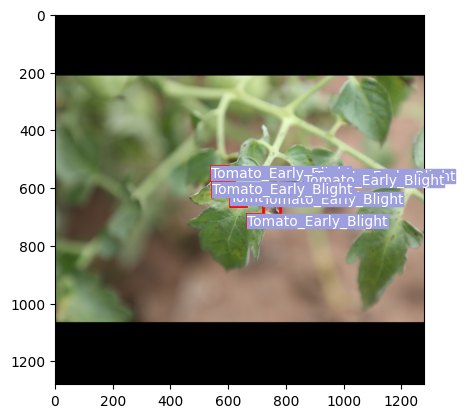

In [24]:
# Defining the grid size and the scaled anchors 
GRID_SIZE = s
scaled_anchors = torch.tensor(ANCHORS) / ( 
	1 / torch.tensor(GRID_SIZE).unsqueeze(1).unsqueeze(1).repeat(1, 3, 2) 
)

# Getting a batch from the dataloader 
x, y = next(iter(loader)) 

# Getting the boxes coordinates from the labels 
# and converting them into bounding boxes without scaling 
boxes = [] 
for i in range(y[0].shape[1]): 
	anchor = scaled_anchors[i] 
	boxes += convert_cells_to_bboxes( 
			y[i], is_predictions=False, s=y[i].shape[2], anchors=anchor 
			)[0] 

# Applying non-maximum suppression 
boxes = nms(boxes, iou_threshold=1, threshold=0.7)

# Plotting the image with the bounding boxes 
plot_image(x[0].permute(1,2,0).to("cpu"), boxes)

In [25]:
x.shape, len(y), y[0].shape

(torch.Size([1, 3, 1280, 1280]), 7, torch.Size([1, 3, 20, 20, 6]))

In [26]:
pretrained_model_state_dict = torch.load("/kaggle/input/plants-leaves-dataset-with-masks-for-segmentation/leafDiseaseDetectionCheckpoint.pth.tar", map_location=torch.device('cpu') )
optimizer_state_dict =pretrained_model_state_dict['optimizer']
pretrained_model_state_dict = pretrained_model_state_dict['state_dict']

/tmp/ipykernel_23/323376894.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pretrained_model_state_dict = torch.load("/kaggle/input/plants-leaves-dataset-with-masks-for-

In [28]:
NUM_ANCHORS = 3
NUM_CLASSES =20
class CNNModule(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(CNNModule, self).__init__()
        # Modify to ensure input channels match convolution weights
        self.conv3x3 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.conv1x1 = nn.Conv2d(out_channels, out_channels, kernel_size=1)
        self.bn3x3 = nn.BatchNorm2d(out_channels)
        self.bn1x1 = nn.BatchNorm2d(out_channels)

    def forward(self, x):
        x = self.conv3x3(x)
        x = self.bn3x3(x)
        x = F.relu(x)
        x = self.conv1x1(x)
        x = self.bn1x1(x)
        x = F.relu(x)
        return x

class CNNBlock(nn.Module):
    def __init__(self, in_channels, out_channels, base_filters):
        super(CNNBlock, self).__init__()

        # Ensure input matches convolution requirements
        self.adjust_input = nn.Conv2d(in_channels, out_channels, kernel_size=1) if in_channels != out_channels else nn.Identity()

        n_modules = out_channels // base_filters
        self.n_modules = n_modules
        self.base_filters = base_filters
        self.out_channels = out_channels

        self.modules_list = nn.ModuleList()

        if n_modules == 1:
            self.modules_list.append(CNNModule(base_filters, base_filters))
        else:
            for i in range(n_modules):
                self.modules_list.append(CNNModule(base_filters, base_filters))

        if n_modules > 1:
            self.final_conv = nn.Conv2d(base_filters * n_modules, out_channels, kernel_size=1)
            self.final_bn = nn.BatchNorm2d(out_channels)

    def forward(self, x):
        # Adjust input channels if needed
        x = self.adjust_input(x)

        n_input_modules = x.size(1) // self.base_filters

        if self.n_modules == 1:
            return self.modules_list[0](x)

        outputs = []

        if n_input_modules == self.n_modules:
            for i in range(self.n_modules):
                start = i * self.base_filters
                end = (i + 1) * self.base_filters
                module_input = x[:, start:end, :, :]
                outputs.append(self.modules_list[i](module_input))
        else:
            for module in self.modules_list:
                outputs.append(module(x))

        x = torch.cat(outputs, dim=1)

        if self.n_modules > 1:
            x = self.final_conv(x)
            x = self.final_bn(x)
            x = F.relu(x)

        return x

class DetectionHead(nn.Module):
    def __init__(self, in_channels, base_filters, num_classes):
        super(DetectionHead, self).__init__()

        # Determine number of modules
        n_modules = in_channels // base_filters

        # Create modules list
        self.modules_list = nn.ModuleList()
        for i in range(n_modules):
            start = i * base_filters
            end = (i + 1) * base_filters
            self.modules_list.append(
                nn.Conv2d(base_filters, base_filters, kernel_size=1)
            )

        # Final 1x1 convolution to num_classes
        self.final_detection_conv = nn.Conv2d(base_filters, num_classes, kernel_size=1)

    def forward(self, x):
        outputs = []

        n_input_modules = x.size(1) // self.modules_list[0].in_channels

        if n_input_modules == len(self.modules_list):
            for i, module in enumerate(self.modules_list):
                start = i * module.in_channels
                end = (i + 1) * module.in_channels
                module_input = x[:, start:end, :, :]
                outputs.append(module(module_input))
        else:
            # If input is not split as expected, process entire input with each module
            for module in self.modules_list:
                outputs.append(module(x))

        # Sum outputs
        x = sum(outputs)

        # Final 1x1 convolution to num_classes
        x = self.final_detection_conv(x)
        x = x.view(x.size(0), NUM_ANCHORS, NUM_CLASSES + 5, x.size(2), x.size(3))
        x = x.permute(0, 1, 3, 4, 2)

        return x

class DetectionModel(nn.Module):
    def __init__(self,channels = 3, base_filters=4, num_classes=NUM_CLASSES, exImSize = 1280, anchor_boxes = NUM_ANCHORS):
        super(DetectionModel, self).__init__()

        # Initial 1x1 convolution
        self.initial_conv = nn.Conv2d(channels, base_filters, kernel_size=1)

        # Encoder (Downsampling) path
        self.encoder_blocks = nn.ModuleList()
        # Encoder skip connections
        self.encoder_skips = nn.ModuleList()

        # Current size to track image dimensions
        current_size = 1280
        current_filters = base_filters

        # Store filter sizes for decoder
        self.filter_sizes = [current_filters]
        smallest = int(exImSize/(2**7))
        # Downsampling layers
        while current_size > smallest:
            # Create CNN Block for current layer
            encoder_block = CNNBlock(current_filters, current_filters * 2, base_filters)
            self.encoder_blocks.append(encoder_block)

            # Create skip connection block
            skip_block = CNNBlock(current_filters, current_filters, base_filters)
            self.encoder_skips.append(skip_block)

            # Update for next iteration
            current_size //= 2
            current_filters *= 2
            self.filter_sizes.append(current_filters)

        # Final bottom block (at 8x8)
        self.bottom_block = CNNBlock(current_filters, current_filters, base_filters)

        # Decoder (Upsampling) path
        self.decoder_blocks = nn.ModuleList()
        self.decoder_upsamples = nn.ModuleList()
        # Intermediate segmentation heads for decoder
        self.segmentation_heads = nn.ModuleList()

        # Reverse filter sizes for decoder (excluding bottom layer)
        self.decoder_filters = list(reversed(self.filter_sizes))
        encoder_filters = list(reversed(self.filter_sizes))
        

        for i in range(len(self.decoder_filters) - 1):
            # Upsampling layer
            upsample = nn.ConvTranspose2d(
                self.decoder_filters[i],
                self.decoder_filters[i] // 2,
                kernel_size=2,
                stride=2
            )
            self.decoder_upsamples.append(upsample)

            # Decoder block (concatenated input from skip connection)
            # Calculate input filters after concatenation
            concat_filters = (encoder_filters[i] + self.decoder_filters[i]) // 2
            decoder_block = CNNBlock(
                concat_filters,
                self.decoder_filters[i] // 2,
                base_filters
            )
            self.decoder_blocks.append(decoder_block)

            # Create intermediate segmentation head for this decoder level
            # Use the new DetectionHead instead of simple Conv2d
            seg_head = DetectionHead(
                self.decoder_filters[i] // 2,
                base_filters,
                (5+num_classes)*anchor_boxes
            )
            self.segmentation_heads.append(seg_head)

    def forward(self, x):
        # Initial 1x1 convolution
        x = self.initial_conv(x)

        # Store skip connections
        skip_connections = []

        # Encoder path
        for block, skip_block in zip(self.encoder_blocks, self.encoder_skips):
            # Store skip connection before downsampling
            skip = skip_block(x)
            skip_connections.append(skip)

            # Downsample and process
            x = F.max_pool2d(x, kernel_size=2)
            x = block(x)

        # Bottom block
        x = self.bottom_block(x)

        # Decoder path
        skip_connections = list(reversed(skip_connections))
        intermediate_outputs = []

        for i, (upsample, decoder_block, seg_head) in enumerate(zip(self.decoder_upsamples, self.decoder_blocks, self.segmentation_heads)):
            # Upsample
            x = upsample(x)

            # Get corresponding skip connection
            skip = skip_connections[i]

            # Concatenate upsampled features with skip connection
            x = torch.cat([x, skip], dim=1)

            # Process through decoder block
            x = decoder_block(x)

            # Generate intermediate segmentation output
            intermediate_seg = seg_head(x)
            intermediate_outputs.append(intermediate_seg)

        # Return final output and intermediate outputs
        return intermediate_outputs
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
detectionModel = DetectionModel().to(DEVICE)

In [29]:
from torchsummary import summary
summary(detectionModel, (3, 1280, 1280))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [-1, 4, 1280, 1280]              16
          Identity-2        [-1, 4, 1280, 1280]               0
            Conv2d-3        [-1, 4, 1280, 1280]             148
       BatchNorm2d-4        [-1, 4, 1280, 1280]               8
            Conv2d-5        [-1, 4, 1280, 1280]              20
       BatchNorm2d-6        [-1, 4, 1280, 1280]               8
         CNNModule-7        [-1, 4, 1280, 1280]               0
          CNNBlock-8        [-1, 4, 1280, 1280]               0
            Conv2d-9          [-1, 8, 640, 640]              40
           Conv2d-10          [-1, 4, 640, 640]             148
      BatchNorm2d-11          [-1, 4, 640, 640]               8
           Conv2d-12          [-1, 4, 640, 640]              20
      BatchNorm2d-13          [-1, 4, 640, 640]               8
        CNNModule-14          [-1, 4, 6

In [30]:
input_tensor = torch.randn(1, 3, 1280, 1280)
output = detectionModel(input_tensor.to(DEVICE))
print(len(output))

for out in output:
  print(out.shape)

7
torch.Size([1, 3, 20, 20, 25])
torch.Size([1, 3, 40, 40, 25])
torch.Size([1, 3, 80, 80, 25])
torch.Size([1, 3, 160, 160, 25])
torch.Size([1, 3, 320, 320, 25])
torch.Size([1, 3, 640, 640, 25])
torch.Size([1, 3, 1280, 1280, 25])


In [31]:
# Defining YOLO loss class 
class ModelLoss(nn.Module): 
	def __init__(self): 
		super().__init__() 
		self.mse = nn.MSELoss() 
		self.bce = nn.BCEWithLogitsLoss() 
		self.cross_entropy = nn.CrossEntropyLoss() 
		self.sigmoid = nn.Sigmoid() 
	
	def forward(self, pred, target, anchors): 
		# Identifying which cells in target have objects 
		# and which have no objects 
		obj = target[..., 0] == 1
		no_obj = target[..., 0] == 0

		# Calculating No object loss 
		no_object_loss = self.bce( 
			(pred[..., 0:1][no_obj]), (target[..., 0:1][no_obj]), 
		) 

		
		# Reshaping anchors to match predictions 
		anchors = anchors.reshape(1, 3, 1, 1, 2) 
		# Box prediction confidence 
		box_preds = torch.cat([self.sigmoid(pred[..., 1:3]), 
							torch.exp(pred[..., 3:5]) * anchors 
							],dim=-1) 
		# Calculating intersection over union for prediction and target 
		ious = iou(box_preds[obj], target[..., 1:5][obj]).detach() 
		# Calculating Object loss 
		object_loss = self.mse(self.sigmoid(pred[..., 0:1][obj]), 
							ious * target[..., 0:1][obj]) 

		
		# Predicted box coordinates 
		pred[..., 1:3] = self.sigmoid(pred[..., 1:3]) 
		# Target box coordinates 
		target[..., 3:5] = torch.log(1e-6 + target[..., 3:5] / anchors) 
		# Calculating box coordinate loss 
		box_loss = self.mse(pred[..., 1:5][obj], 
							target[..., 1:5][obj]) 

		
		# Claculating class loss 
		class_loss = self.cross_entropy((pred[..., 5:][obj]), 
								target[..., 5][obj].long()) 

		# Total loss 
		return ( 
			box_loss 
			+ object_loss 
			+ no_object_loss 
			+ class_loss 
		)

In [32]:
import torch
from torch.optim.lr_scheduler import CosineAnnealingLR
from tqdm import tqdm

torch.manual_seed(42)

# Define the train function to train the model
def training_loop(loader, model, 
                  optimizer, loss_fn, 
                  scaler, scaled_anchors, num_epochs=10,
                  initial_lr=1e-3, min_lr=1e-5, device="cuda", numVizPerEpoch=10):
    # Creating a progress bar
    progress_bar = tqdm(loader, leave=True)
    scheduler = CosineAnnealingLR(optimizer, T_max=num_epochs, eta_min=min_lr)
    # Initializing a list to store the losses
    losses = []
    
    # Iterating over the training data
    for _, (x, y) in enumerate(progress_bar):
        x = x.to(device)
        y0, y1, y2, y3, y4, y5, y6 = (
            y[0].to(device),
            y[1].to(device),
            y[2].to(device),
            y[3].to(device),
            y[4].to(device),
            y[5].to(device),
            y[6].to(device),
        )
        
        with torch.cuda.amp.autocast():
            # Getting the model predictions
            outputs = model(x)
            # Calculating the loss at each scale
            loss = (
                loss_fn(outputs[0], y0, scaled_anchors[0]) +
                loss_fn(outputs[1], y1, scaled_anchors[1]) +
                loss_fn(outputs[2], y2, scaled_anchors[2]) +
                loss_fn(outputs[3], y3, scaled_anchors[3]) +
                loss_fn(outputs[4], y4, scaled_anchors[4]) +
                loss_fn(outputs[5], y5, scaled_anchors[5]) +
                loss_fn(outputs[6], y6, scaled_anchors[6])
            )
        
        # Add the loss to the list
        losses.append(loss.item())
        # Reset gradients
        optimizer.zero_grad()
        # Backpropagate the loss
        scaler.scale(loss).backward()
        # Optimization step
        scaler.step(optimizer)
        # Update the scaler for next iteration
        scaler.update()
        scheduler.step()
        
        # Update progress bar with mean loss
        mean_loss = sum(losses) / len(losses)
        progress_bar.set_postfix(loss=mean_loss)
        
        # Save checkpoint
        save_checkpoint(model, optimizer, filename=f"checkpoint.pth.tar")
    
    return model


In [33]:
def adaptive_training_schedule(model, train_loader,
                                initial_epochs=10,
                                initial_lr=1e-3,
                                initial_min_lr=1e-5,
                                lr_decay_factor=0.85,
                                min_lr_decay_factor=0.15,
                                epochs_growth_factor=1.5):
    """
    Adaptive training schedule with decreasing learning rates and increasing epochs

    Args:
        model: UNet model
        train_loader: Training data loader
        val_loader: Validation data loader
        initial_epochs: Initial number of training epochs
        initial_lr: Initial maximum learning rate
        initial_min_lr: Initial minimum learning rate
        lr_decay_factor: Factor to reduce max learning rate
        min_lr_decay_factor: Factor to reduce min learning rate
        epochs_growth_factor: Factor to increase number of epochs
    """
    current_epochs = initial_epochs
    current_lr = initial_lr
    current_min_lr = initial_min_lr
    totalEpochs = 0

    while totalEpochs < 30:  # Preventing infinite loop
        print(f"\nStarting Training Schedule:")
        print(f"Epochs: {current_epochs}")
        print(f"Max LR: {current_lr}")
        print(f"Min LR: {current_min_lr}")
        current_epochs = int(current_epochs) if totalEpochs+current_epochs<31 else 30-current_epochs
        totalEpochs += current_epochs
        
        # Train for current schedule
        model = training_loop(train_loader, model, optimizer, loss_fn, 
                              scaler, scaled_anchors, num_epochs=current_epochs,
                              initial_lr=current_lr, min_lr=current_min_lr)

        # Update parameters for next schedule
        current_epochs = int(current_epochs * epochs_growth_factor)
        current_lr *= lr_decay_factor
        current_min_lr *= min_lr_decay_factor

    return model

In [34]:
# Creating the model from YOLOv3 class 
model =  detectionModel.to(device) 

# Defining the optimizer 
optimizer = optim.Adam(model.parameters(), lr = leanring_rate) 
optimizer.load_state_dict(optimizer_state_dict)

# Defining the loss function 
loss_fn = ModelLoss()
torch.manual_seed(42)

# Defining the scaler for mixed precision training 
scaler = torch.amp.GradScaler('cuda')

# Defining the train dataset 
train_dataset = Dataset(
	csv_file="/kaggle/input/ghana-crop-disease/Train.csv", 
	image_dir="/kaggle/input/ghana-crop-disease/images", 
	grid_sizes=s, 
	anchors=ANCHORS,
	transform=train_transform 
) 

# Defining the train data loader 
train_loader = torch.utils.data.DataLoader( 
	train_dataset, 
	batch_size = batch_size, 
	num_workers = 2, 
	shuffle = True, 
	pin_memory = True, 
) 

# Scaling the anchors 
scaled_anchors = ( 
	torch.tensor(ANCHORS) *
	torch.tensor(s).unsqueeze(1).unsqueeze(1).repeat(1,3,2) 
).to(device) 

In [35]:
# Training the model 
adaptive_training_schedule(model, train_loader)


Starting Training Schedule:
Epochs: 10
Max LR: 0.001
Min LR: 1e-05


  0%|          | 0/1081 [00:00<?, ?it/s]/tmp/ipykernel_23/952545234.py:31: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(
  0%|          | 0/1081 [00:08<?, ?it/s, loss=40]

==> Saving checkpoint


  0%|          | 1/1081 [00:11<2:51:27,  9.53s/it, loss=41.9]

==> Saving checkpoint


  0%|          | 2/1081 [00:14<1:37:07,  5.40s/it, loss=43.5]

==> Saving checkpoint


  0%|          | 3/1081 [00:16<1:17:15,  4.30s/it, loss=43.5]

==> Saving checkpoint


  0%|          | 4/1081 [00:19<1:03:58,  3.56s/it, loss=43.2]

==> Saving checkpoint


  0%|          | 5/1081 [00:21<57:12,  3.19s/it, loss=43.6]  

==> Saving checkpoint


  1%|          | 6/1081 [00:24<53:51,  3.01s/it, loss=42.8]

==> Saving checkpoint


  1%|          | 7/1081 [00:26<50:31,  2.82s/it, loss=43.6]

==> Saving checkpoint


  1%|          | 8/1081 [00:29<48:15,  2.70s/it, loss=43.3]

==> Saving checkpoint


  1%|          | 9/1081 [00:32<48:03,  2.69s/it, loss=43]  

==> Saving checkpoint


  1%|          | 10/1081 [00:35<54:08,  3.03s/it, loss=42.5]

==> Saving checkpoint


  1%|          | 11/1081 [00:39<55:25,  3.11s/it, loss=42.4]

==> Saving checkpoint


  1%|          | 12/1081 [00:42<58:13,  3.27s/it, loss=42.2]

==> Saving checkpoint


  1%|          | 13/1081 [00:46<1:00:08,  3.38s/it, loss=42.4]

==> Saving checkpoint


  1%|▏         | 14/1081 [00:50<1:02:03,  3.49s/it, loss=42.1]

==> Saving checkpoint


  1%|▏         | 15/1081 [00:53<1:01:12,  3.44s/it, loss=42]  

==> Saving checkpoint


  1%|▏         | 16/1081 [00:57<1:01:11,  3.45s/it, loss=42.1]

==> Saving checkpoint


  2%|▏         | 17/1081 [01:00<1:01:58,  3.49s/it, loss=41.9]

==> Saving checkpoint


  2%|▏         | 18/1081 [01:04<1:02:35,  3.53s/it, loss=41.6]

==> Saving checkpoint


  2%|▏         | 19/1081 [01:07<1:01:49,  3.49s/it, loss=41.5]

==> Saving checkpoint


  2%|▏         | 20/1081 [01:11<1:02:26,  3.53s/it, loss=41.4]

==> Saving checkpoint


  2%|▏         | 21/1081 [01:14<1:02:41,  3.55s/it, loss=41.3]

==> Saving checkpoint


  2%|▏         | 22/1081 [01:18<1:03:15,  3.58s/it, loss=41.2]

==> Saving checkpoint


  2%|▏         | 23/1081 [01:20<1:01:50,  3.51s/it, loss=41.2]


KeyboardInterrupt: 

In [36]:
# Taking a sample image and testing the model 

# Setting the load_model to True 
load_model = True
torch.manual_seed(42)
# Defining the model, optimizer, loss function and scaler 
model =  detectionModel.to(device) 
optimizer = optim.Adam(model.parameters(), lr = leanring_rate) 
loss_fn = ModelLoss() 
scaler = torch.cuda.amp.GradScaler()
checkpoint_file = "/kaggle/input/plants-leaves-dataset-with-masks-for-segmentation/leafDiseaseDetectionCheckpoint.pth.tar"

# Loading the checkpoint 
if load_model: 
	load_checkpoint(checkpoint_file, model, optimizer, leanring_rate) 

/tmp/ipykernel_23/3830614700.py:10: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()
/tmp/ipykernel_23/3653737080.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full con

==> Loading checkpoint


In [37]:
len(pd.read_csv("/kaggle/input/ghana-crop-disease/Test.csv")['Image_ID'].values.tolist())

2101

In [38]:
class TestDataset(torch.utils.data.Dataset):
    def __init__(
        self, csv_file, image_dir, anchors,
        image_size=1280, grid_sizes=[IMAGE_SIZES//(2**i) for i in range(6,-1,-1)],
        num_classes=20, transform=None, min_object_size=20, eps=1e-4, train=True
    ):
        """
        Args:
            csv_file (str): Path to annotations CSV
            image_dir (str): Directory with images
            anchors list[list[tuple(int)]]: anchors for different feature maps
            image_size (int): Image size for resizing (height, width)
            min_object_size (int): Minimum size in pixels for objects after resizing
        """
        # Read the csv file with image names and labels
        self.annotations = pd.read_csv(csv_file)
        self.image_names = self.annotations['Image_ID'].values.tolist()
        # Image and label directories
        self.image_dir = image_dir
        # Image size
        self.image_size = image_size
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        # Getting the image path and name
        img_id = self.image_names[idx]
        
        # Load image
        img_path = os.path.join(self.image_dir, img_id)
        image = np.array(Image.open(img_path).convert('RGB'))
        
        # Albumentations augmentations
        if self.transform:
            augs = self.transform(image=image)
            image = augs["image"]
            
        # Return both the image and the image name
        return image, img_id

# Define the test dataset and data loader
test_dataset = TestDataset(
    csv_file="/kaggle/input/ghana-crop-disease/Test.csv",
    image_dir="/kaggle/input/ghana-crop-disease/images",
    grid_sizes=s,
    anchors=ANCHORS,
    transform=test_transform
)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=1,
    num_workers=2,
    shuffle=True
)

In [40]:
# Set the model to evaluation mode
model.eval()
preds = dict()
# Disable gradient calculation for inference
with torch.inference_mode():
    # Getting the model predictions
    for batch_images, batch_names in tqdm(test_loader):
        print(f"Processing images: {batch_names}")
        
        output = model(batch_images.to(DEVICE))
    
        # Preparing bounding boxes storage
        bboxes = [[] for _ in range(batch_images.shape[0])]
    
        # Calculate scaled anchors for each grid size
        anchors = (
            torch.tensor(ANCHORS)
            * torch.tensor(s).unsqueeze(1).unsqueeze(1).repeat(1, 3, 2)
        ).to(device)
    
        # Generate bounding boxes for each scale
        for i in range(len(output)):
            batch_size, A, S, _, _ = output[i].shape
            anchor = anchors[i]
            boxes_scale_i = convert_cells_to_bboxes(
                output[i], anchor, s=S, is_predictions=True
            )
            for idx, box in enumerate(boxes_scale_i):
                bboxes[idx] += box
        for i in range(len(bboxes)):
            # Apply non-max suppression to remove overlapping bounding boxes
            nms_boxes = nms(bboxes[i], iou_threshold=0.5, threshold=0.6)
            print(nms_boxes)
            preds[batch_names] = nms_boxes
import joblib
joblib.dump(preds, 'preds.joblib')

# Return to training mode
model.train()
print(bboxes)

# Visualize the results for each image in the batch
for i in range(len(bboxes)):
    # Apply non-max suppression to remove overlapping bounding boxes
    nms_boxes = nms(bboxes[i], iou_threshold=0.5, threshold=0.6)
    print(nms_boxes)

    # Plot the image with bounding boxes
    plot_image(x[i].permute(1, 2, 0).detach().cpu(), nms_boxes)

  0%|          | 0/2101 [00:00<?, ?it/s]

Processing images: ('id_7fiufn.jpg',)


  0%|          | 1/2101 [00:09<5:15:19,  9.01s/it]

[]
Processing images: ('id_s5lbjw.jpg',)


  0%|          | 2/2101 [00:17<5:05:51,  8.74s/it]

[]
Processing images: ('id_8t239a.jpg',)


  0%|          | 3/2101 [00:58<13:33:15, 23.26s/it]

[[4.0, 0.6926136612892151, 0.5261663198471069, 0.5311018228530884, 1.9500395059585571, 3.14953875541687], [4.0, 0.6860944628715515, 0.3274439573287964, 0.7798801064491272, 1.3900830745697021, 3.057986259460449], [2.0, 0.6808959245681763, 0.3021397292613983, 0.7682676315307617, 0.07138794660568237, 0.2518204152584076], [2.0, 0.6805531978607178, 0.3021363615989685, 0.7698319554328918, 0.07099927961826324, 0.2524901032447815], [2.0, 0.6804289817810059, 0.3005702793598175, 0.768274188041687, 0.07029333710670471, 0.25498059391975403], [2.0, 0.6786291599273682, 0.29901203513145447, 0.7682711482048035, 0.07101030647754669, 0.2538148760795593], [2.0, 0.6784541606903076, 0.29901036620140076, 0.766709566116333, 0.07081875205039978, 0.25414201617240906], [4.0, 0.6782718300819397, 0.2744133174419403, 0.8283711671829224, 1.9342507123947144, 2.9191079139709473], [2.0, 0.6778071522712708, 0.3005719780921936, 0.7651486396789551, 0.070645272731781, 0.2550644278526306], [2.0, 0.6777053475379944, 0.30057

  0%|          | 4/2101 [01:06<10:02:26, 17.24s/it]

[]
Processing images: ('id_vr4hmd.jpg',)


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7eeb8de73e50>>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 
  0%|          | 4/2101 [01:57<17:02:51, 29.27s/it]


KeyboardInterrupt: 

In [41]:
import joblib

Signature: joblib.dump(value, filename, compress=0, protocol=None, cache_size=None)
Source:   
def dump(value, filename, compress=0, protocol=None, cache_size=None):
    """Persist an arbitrary Python object into one file.

    Read more in the :ref:`User Guide <persistence>`.

    Parameters
    ----------
    value: any Python object
        The object to store to disk.
    filename: str, pathlib.Path, or file object.
        The file object or path of the file in which it is to be stored.
        The compression method corresponding to one of the supported filename
        extensions ('.z', '.gz', '.bz2', '.xz' or '.lzma') will be used
        automatically.
    compress: int from 0 to 9 or bool or 2-tuple, optional
        Optional compression level for the data. 0 or False is no compression.
        Higher value means more compression, but also slower read and
        write times. Using a value of 3 is often a good compromise.
        See the notes for more details.
        If com